In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
data = scipy.io.loadmat('data/ex5data1.mat')

# 1. Plot given data

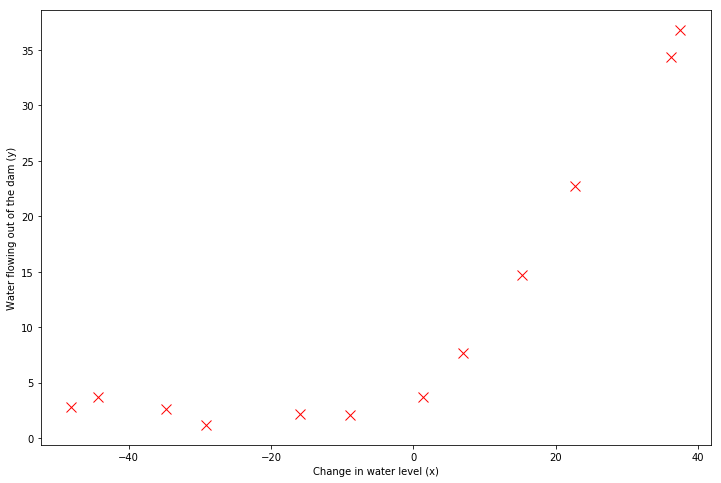

In [2]:
X = data['X']
Y = data['y']
Xval = data['Xval']
Yval = data['yval']
Xtest = data['Xtest']
Ytest = data['ytest']
m = X.shape[0]

plt.figure(figsize=(12,8))
plt.plot(X, Y, 'rx', markersize=10)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

# Append column of ones to X after plotting
X = np.concatenate((np.ones((m, 1)), X), axis=1)
Y = Y.reshape(Y.size)

# 2. Regularized linear regression cost function

In [3]:
def h(theta, X):
    return np.dot(X, theta.T)

def linear_reg_cost_function(theta, X, Y, lambda_):
    J = np.sum((h(theta, X) - Y) * (h(theta, X) - Y)) / (2*m)
    J += np.sum(theta[1:] * theta[1:]) * lambda_ / (2*m)
    return J

theta = np.ones(2)
print "Regularized cost at theta = [1 , 1]: ", linear_reg_cost_function(theta, X, Y, 1)

Regularized cost at theta = [1 , 1]:  303.99319222


# 3. Regularized linear regression gradient

In [4]:
def linear_reg_gradient(theta, X, Y, lambda_):
    grad = np.dot((h(theta, X) - Y).T, X) / m
    grad[1:] += (lambda_ / float(m)) * theta[1:]
    return grad

print "Gradient at theta = [1 , 1]: ", linear_reg_gradient(theta, X, Y, 1)

Gradient at theta = [1 , 1]:  [ -15.30301567  598.25074417]


# 4. Train linear regression

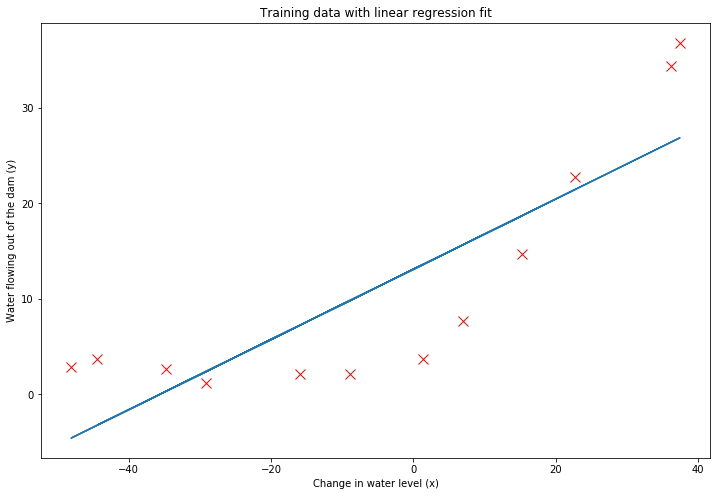

In [5]:
import scipy.optimize as opt

def train_linear_reg(X, Y, lambda_):
    initial_theta = np.zeros((X.shape[1], 1))
    theta = opt.fmin_cg(linear_reg_cost_function,
       x0=initial_theta,
       fprime=linear_reg_gradient,
       maxiter=100,
       disp=False,
       args=(X, Y, lambda_))
    return theta

theta = train_linear_reg(X, Y, 0)

# Plot the fit over data (Linear fit is not the best fit for the data, as shown by the visualization)
plt.figure(figsize=(12,8))
plt.plot(X[:, 1:],Y, 'rx', markersize=10, label="Training data")
plt.plot(X[:,1], np.dot(X, theta), '-', label="Linear Regression")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Training data with linear regression fit')
plt.show()